Task 3(DATA SCIENCE AND ANALYTICS INTERNSHIP)
-DIVYA KHYANI

# AIM: To Explore Unsupervised Machine Learning

DESCRIPTION : In this K-means Clustering task, an attempt is made in predicting the optimum number of clusters from the given ‘Iris’ dataset and representing it visually.

# Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn import datasets
%matplotlib inline

# Warnings if any...

In [34]:
import warnings
warnings.filterwarnings("ignore")

# Importing and Reading the dataset

In [47]:
iris_data = pd.read_csv('Iris.csv')


# The first 5 rows

In [48]:
iris_data.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# The last 5 rows

In [49]:
iris_data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


# Breif Description of dataset

In [50]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# Total number of Rows and Columns

In [51]:
iris_data.shape

(150, 6)

there are 150 rows and 4 Columns as seen by using the shape function

# Columns of the DataSet

In [52]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# DATA VISUALIZATION

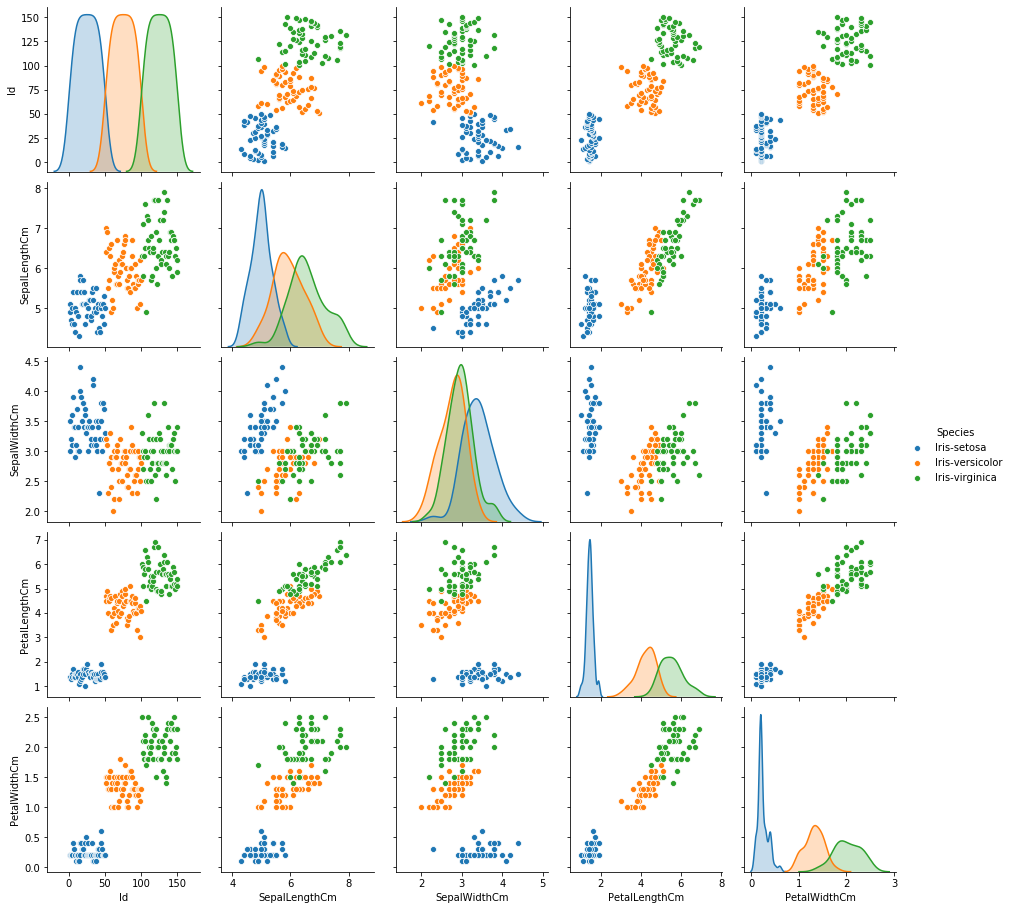

In [59]:
sns.pairplot(data=iris_data,hue='Species')

In [60]:
df=iris_data.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


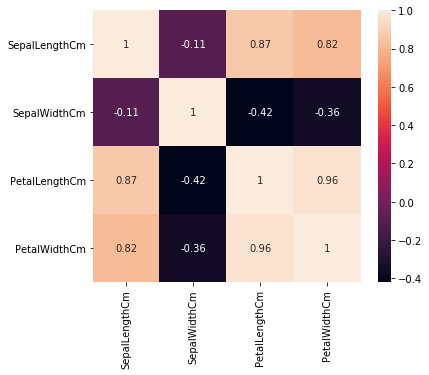

In [62]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Preparing the dataset

Dropping the Id Column

In [63]:
iris_data.drop(['Id'],axis=1,inplace=True)
x=iris_data.iloc[:,:-1].values

# Implementing Elbow Method

In [64]:
wcss = []

for i in range(1, 15):
    #Building and fitting the model
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
print(wcss)

[680.8244, 152.36870647733906, 78.94084142614602, 57.345409315718165, 46.53558205128205, 38.93873974358974, 34.19068792479662, 29.905374299825105, 27.927882157034972, 25.95549708624709, 24.416268037518037, 22.711674783549785, 21.3569512987013, 19.905847943722947]


# Plotting the results

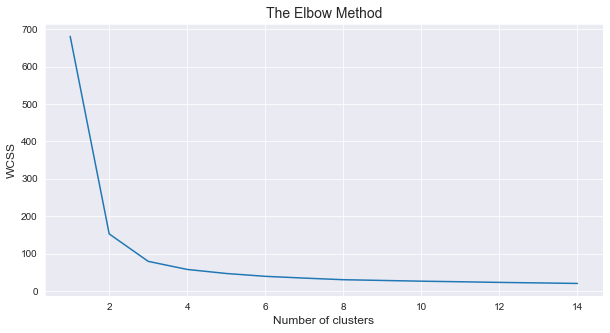

In [65]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method',size=14)
plt.xlabel('Number of clusters',size=12)
plt.ylabel('WCSS',size=12)#within cluster sum of squares
plt.show()

from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) 
doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [66]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [68]:
df1=iris_data.copy()
df1['Cluster']=y_kmeans
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


# Visualizing the Clusters

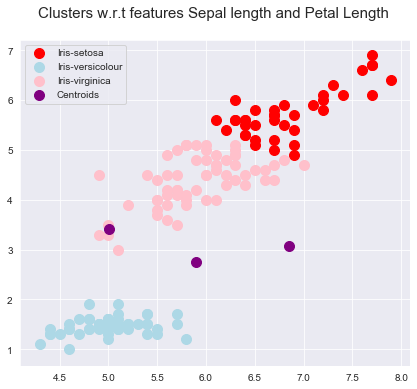

In [75]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t features Sepal length and Petal Length \n',size=15)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 2], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 2], 
            s = 100, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.show()

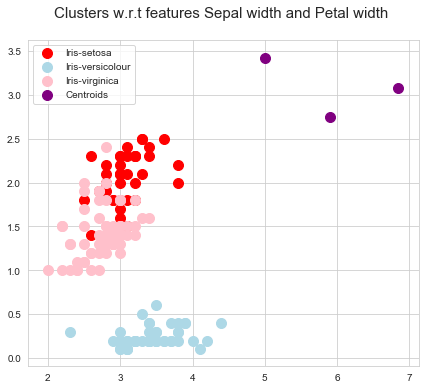

In [74]:
sns.set_style("whitegrid")
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t features Sepal width and Petal width \n',size=15)

plt.scatter(x[y_kmeans == 0, 1], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 1], x[y_kmeans == 1, 3], 
            s = 100, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 1], x[y_kmeans == 2, 3],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.show()

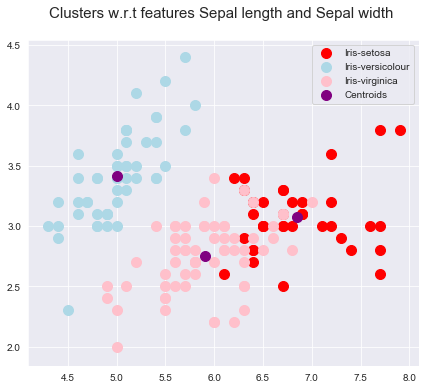

In [77]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,6))
plt.title('Clusters w.r.t features Sepal length and Sepal width \n',size=15)

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'lightblue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'pink', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'purple', label = 'Centroids')

plt.legend()
plt.show()

# ------------------------------------------------The End---------------------------------------------------